In [18]:
import pandas as pd

data_path = 'data/Fish.csv'
df = pd.read_csv(data_path)

In [50]:
cond = df['Species'].isin(['Bream', 'Smelt'])
fish_data = df.loc[cond, ['Length2', 'Weight']]
fish_data.shape

(49, 2)

In [51]:
fish_target = df.loc[cond, ['Species']]
fish_target.shape

(49, 1)

In [52]:
from sklearn.model_selection import train_test_split

In [55]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, test_size = 0.2, random_state=42)

In [56]:
test_target

,Species
13,Bream
155,Smelt
157,Smelt
154,Smelt
17,Bream
27,Bream
26,Bream
25,Bream
31,Bream
19,Bream


In [57]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [58]:
kn.score(test_input, test_target['Species'])

1.0

In [59]:
kn.predict([[25,150]])

/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

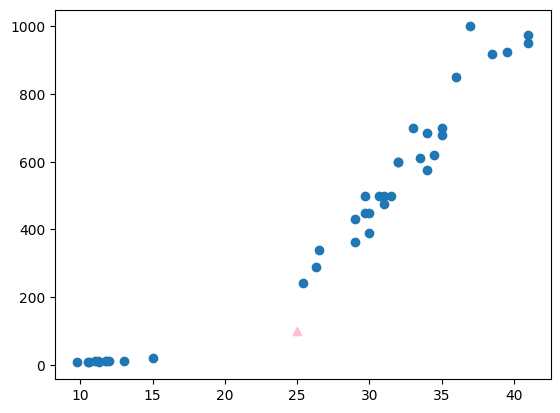

In [60]:
import matplotlib.pyplot as plt

plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25,100, marker='^', color = 'pink')

In [61]:
kn.kneighbors([[25,150]])

/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 138.32150953, 140.00603558,
         140.62090883]]),
 array([[15, 32,  8, 22,  7]]))

In [62]:
mean = train_input.mean()
std = train_input.std()
mean

Length2     26.764103
Weight     434.133333
dtype: float64

In [63]:
train_scaled = (train_input - mean)/std

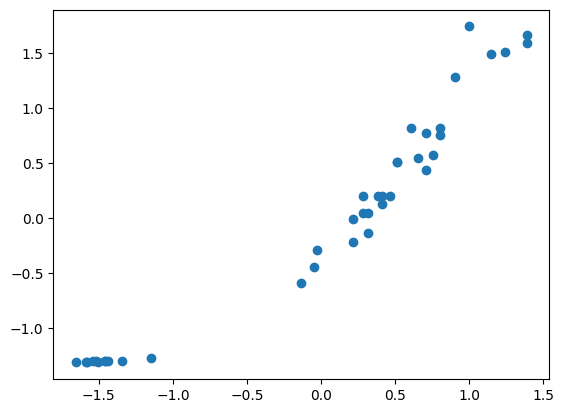

In [64]:
plt.scatter(train_scaled['Length2'], train_scaled['Weight'])

In [65]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [66]:
test_scaled = (test_input - mean) / std # Length와 Weight의 데이터 범위가 다르기 때문에 표준화 진행

In [67]:
kn.score(test_scaled, test_target)

1.0

In [68]:
new = ([25,150] - mean) / std
new

Length2   -0.172031
Weight    -0.875220
dtype: float64

In [69]:
kn.predict([new])

/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)